<a href="https://colab.research.google.com/github/XunFlowerrr/Statistics-for-Computer-Engineering/blob/hw1/Copy_of_stat_HW1_part1_Pandas_for_CEDT_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Pandas
The goal of this assignment is to practice using pandas to analyze and manipulate data. You will explore the dataset and perform various analyses to extract meaningful insights.



Import lib and dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!wget https://raw.githubusercontent.com/PacharaWin/CEDT_stat_data_2024/main/HW1/part1_horse_race_HK.csv

--2024-08-08 08:01:03--  https://raw.githubusercontent.com/PacharaWin/CEDT_stat_data_2024/main/HW1/part1_horse_race_HK.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3145750 (3.0M) [text/plain]
Saving to: ‘part1_horse_race_HK.csv.1’

part1_horse_race_HK 100%[===================>]   3.00M  --.-KB/s    in 0.02s   

2024-08-08 08:01:03 (180 MB/s) - ‘part1_horse_race_HK.csv.1’ saved [3145750/3145750]



In [ ]:
df = pd.read_csv('/content/part1_horse_race_HK.csv')
df.head(5)

,finishing_position,horse_number,horse_name,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,length_behind_winner,running_position_1,running_position_2,running_position_3,finish_time,win_odds,race_id,horse_gender,nationality
0,1,1.0,DOUBLE DRAGON,K019,B Prebble,D Cruz,133,1032,1,-,1.0,2.0,2.0,1.22.33,3.8,2014-001,male,Indian
1,2,2.0,PLAIN BLUE BANNER,S070,D Whyte,D E Ferraris,133,1075,13,2,8.0,9.0,9.0,1.22.65,8.0,2014-001,female,Chinese
2,3,10.0,GOLDWEAVER,P072,Y T Cheng,Y S Tsui,121,1065,3,2,2.0,1.0,1.0,1.22.66,5.7,2014-001,female,Indian
3,4,3.0,SUPREME PROFIT,P230,J Moreira,C S Shum,132,1222,2,2,6.0,4.0,5.0,1.22.66,6.1,2014-001,male,Brazilian
4,5,7.0,THE ONLY KID,H173,Z Purton,K W Lui,125,1136,9,4-1/4,9.0,10.0,10.0,1.23.02,6.1,2014-001,male,Nigerian


This dataset has already been cleaned, and all the NaN values are gone. You can also see the data type of each column using the info() method.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29542 entries, 0 to 29541
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   finishing_position     29542 non-null  object 
 1   horse_number           29542 non-null  float64
 2   horse_name             29542 non-null  object 
 3   horse_id               29542 non-null  object 
 4   jockey                 29542 non-null  object 
 5   trainer                29542 non-null  object 
 6   actual_weight          29542 non-null  int64  
 7   declared_horse_weight  29542 non-null  int64  
 8   draw                   29542 non-null  int64  
 9   length_behind_winner   29542 non-null  object 
 10  running_position_1     29542 non-null  float64
 11  running_position_2     29542 non-null  float64
 12  running_position_3     29542 non-null  float64
 13  finish_time            29542 non-null  object 
 14  win_odds               29542 non-null  float64
 15  ra

#### TODO 1: How many rows and columns in this dataframe?

In [ ]:
# Write your code here.
df.shape

(29542, 18)

The dataset contains the race results of 1,561 local races throughout the Hong Kong racing seasons of 2014-2016. Since it is a horse racing dataset, each horse can race multiple times.


#### TODO 2: How many unique horses are there in the cleaned dataset?

In [ ]:
# Write your code here.
df['horse_id'].nunique()

2155

#### TODO 3: How many unique male horse are there in the dataset?

In [ ]:
# Write your code here.
df[df['horse_gender'] == 'male']['horse_id'].nunique()

1275

declared_weight - declared weight of the horse and jockey, in lbs

actual_weight - actual weight carried by the horse, in lbs

#### TODO 4: What is the average declared weight of the horses in the DataFrame?
Hint: You may need to convert the type in the series to int  
  Hint2: No need to make the horse unique()

In [ ]:
# Write your code here.
df['declared_horse_weight'] = df['declared_horse_weight'].astype(int)
df['declared_horse_weight'].mean()

1108.9913343714034

#### TODO 5: Give me the names of the top 5 horses that have won the most races.
Hint: Be careful of the variable type

In [ ]:
# Write your code here.
winners = df[df['finishing_position'] == '1']

# Count wins per horse
win_counts = winners['horse_name'].value_counts()

# Get top 5 horses with most wins
top_5_horses = win_counts.head(5)

print(top_5_horses)

horse_name
CONTENTMENT       10
SUPREME PROFIT     9
LUCKY YEAR         8
BLIZZARD           8
RAPPER DRAGON      8
Name: count, dtype: int64


#### TODO 6: Some jockeys can race multiple times. Who is the jockey that has won the most races?

In [ ]:
# Write your code here.
winners = df[df['finishing_position'] == '1']

# Count wins per horse
win_counts = winners['jockey'].value_counts()

# Get top 5 horses with most wins
top = win_counts.head(1)

print(top.index[0])

J Moreira


#### TODO 7: Some horses in this dataset have inconsistent weights (same horse_id but different weights). How many horses have consistent actual_weight values for each horse_id?

Hint: You may use groupby() to solve this question.

In [ ]:
# Write your code here.
consistent_weights = df.groupby('horse_id')['actual_weight'].nunique() == 1

# Count the number of horse_ids with consistent weights
num_consistent_horses = consistent_weights.sum()
print(num_consistent_horses)

216


## Visualization


In [ ]:
import matplotlib.pyplot as plt

#### Practice: Plot a bar chart showing the number of unique horses compared to their nationality.

The answer should look like this.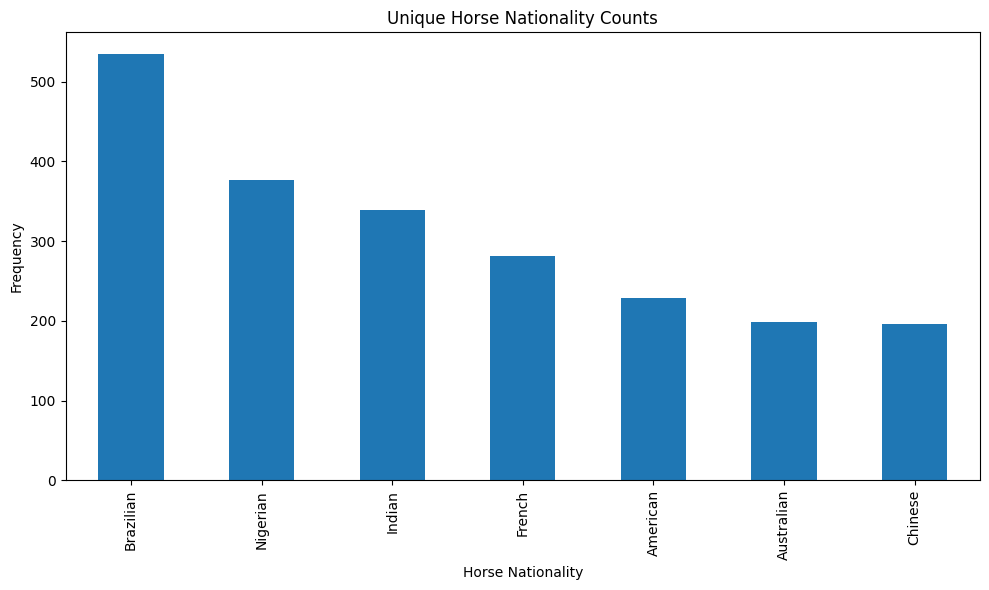

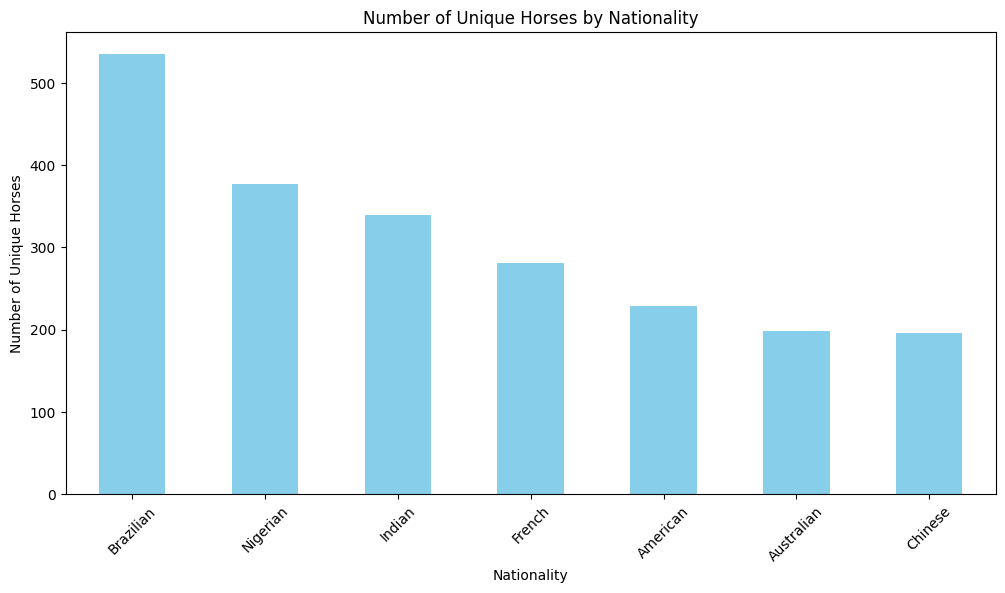

In [ ]:
# Write your code here.
unique_horses_by_nationality = df.groupby('nationality')['horse_id'].nunique().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
unique_horses_by_nationality.plot(kind='bar', color='skyblue')
plt.xlabel('Nationality')
plt.ylabel('Number of Unique Horses')
plt.title('Number of Unique Horses by Nationality')
plt.xticks(rotation=45)
plt.show()